# 데이터셋 톺아보기

패션, 유통, 전자상거래 도메인과 관련된 데이터셋 몇 가지를 취득하고<br>
각 데이터셋의 구조와 항목, 수치 등을 간단하게 분석

# Package Install

In [280]:
## 데이터 조작 및 정제
import pandas as pd
import numpy as np

## 시각화
import matplotlib.pyplot as plt
import seaborn as sns

## Singapore Fashion Facebook posts

출처 : Kaggle

싱가폴의 유명한 4개의 패션 브랜드(DMK, Charles & Keith, Sunday Staples, Design & Comfort)에서 게시한 페이스북 포스트를 취합한 데이터셋

[Dataset Link](https://www.kaggle.com/datasets/annguyennt/singapore-fashion-facebook-posts)

### Columns

* Brand : post를 게시한 브랜드 명
* post_id : post를 게시한 facebook ID (비식별화된 것으로 보임)
* post_text : 게시된 글
* like : 좋아요 표시 갯수
* comments : 댓글 갯수
* shares : 공유 갯수
* post_url : 게시글 URL 주소
* sentiment_score : 게시글에 대한 감정분석 점수 (+ : 긍정, - : 부정)
* sentiment_magnitude : 게시글에 대한 감정분석 점수 (복합 감정일 경우 점수가 높음)

In [281]:
df = pd.read_csv('datasets/facebook_post.csv')

df.head()

,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
0,DMK,5.311750e+15,Start on the right foot for your first impress...,2021-04-03 11:36:51,177,0,0,https://facebook.com/DMKShoes/posts/5311745528...,0.2,0.7
1,DMK,5.307740e+15,Getting that crop top + wide trousers combo ri...,2021-04-02 15:58:02,216,0,0,https://facebook.com/DMKShoes/posts/5307740495...,0.3,0.9
2,DMK,5.302814e+15,Sweet dreams are made of these - Bubble Dream ...,2021-04-01 16:17:29,385,0,0,https://facebook.com/DMKShoes/posts/5302814246...,0.4,1.2
3,DMK,5.292993e+15,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",2021-03-30 15:41:29,214,0,0,https://facebook.com/DMKShoes/posts/5292992840...,0.0,4.5
4,DMK,5.280722e+15,"@annavanticalopez: ""When I first started model...",2021-03-28 11:36:40,118,0,0,https://facebook.com/DMKShoes/posts/5280721625...,0.0,3.4


In [282]:
len(df)

4010

결측치 제거

In [283]:
df.isnull().sum()

Brand                     0
post_id                   1
post_text              1416
time                      0
likes                     0
comments                  0
shares                    0
post_url                  1
sentiment_score        1531
sentiment_magnitude    1531
dtype: int64

In [284]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

len(df)

1427

In [285]:
df.head(10)

,index,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
0,0,DMK,5.311750e+15,Start on the right foot for your first impress...,2021-04-03 11:36:51,177,0,0,https://facebook.com/DMKShoes/posts/5311745528...,0.2,0.7
1,1,DMK,5.307740e+15,Getting that crop top + wide trousers combo ri...,2021-04-02 15:58:02,216,0,0,https://facebook.com/DMKShoes/posts/5307740495...,0.3,0.9
2,2,DMK,5.302814e+15,Sweet dreams are made of these - Bubble Dream ...,2021-04-01 16:17:29,385,0,0,https://facebook.com/DMKShoes/posts/5302814246...,0.4,1.2
3,3,DMK,5.292993e+15,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",2021-03-30 15:41:29,214,0,0,https://facebook.com/DMKShoes/posts/5292992840...,0.0,4.5
4,4,DMK,5.280722e+15,"@annavanticalopez: ""When I first started model...",2021-03-28 11:36:40,118,0,0,https://facebook.com/DMKShoes/posts/5280721625...,0.0,3.4
5,5,DMK,5.274530e+15,"@annavanticalopez - ""When people say models of...",2021-03-27 11:47:06,118,0,0,https://facebook.com/DMKShoes/posts/5274528565...,0.2,2.3
6,6,DMK,5.270390e+15,"@wordweed: ""Over the years, I have learnt that...",2021-03-26 15:38:45,240,0,0,https://facebook.com/DMKShoes/posts/5270394933...,0.3,3.1
7,7,DMK,5.254415e+15,"@wordweed: ""Body image is something I struggle...",2021-03-23 16:42:53,257,0,0,https://facebook.com/DMKShoes/posts/5254414754...,-0.2,3.8
8,8,DMK,5.245398e+15,"@wordweed - ""To a certain extent, I still have...",2021-03-21 11:54:21,264,0,0,https://facebook.com/DMKShoes/posts/5245397932...,0.0,3.3
9,9,DMK,5.241255e+15,"This March, celebrate International Women’s Mo...",2021-03-20 11:50:34,194,0,0,https://facebook.com/DMKShoes/posts/5241254805...,0.3,3.0


In [286]:
df.tail(10)

,index,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
1417,3987,Charles & Keith,1.015688e+16,Something Special – Just For You\n \n Receive ...,2019-05-01 15:00:00,289,8,0,https://facebook.com/charleskeithofficial/post...,0.1,2.0
1418,3994,Charles & Keith,1.015687e+16,Follow some of the most fashionable personalit...,2019-04-28 21:00:01,58,0,2,https://facebook.com/charleskeithofficial/post...,0.5,1.0
1419,3995,Charles & Keith,1.015687e+16,Follow some of the most fashionable personalit...,2019-04-28 15:00:00,175,7,0,https://facebook.com/charleskeithofficial/vide...,0.3,1.1
1420,3996,Charles & Keith,1.015687e+16,Drawing inspiration from the vibrancy of every...,2019-04-27 21:00:00,191,2,0,https://facebook.com/charleskeithofficial/post...,0.5,1.1
1421,3997,Charles & Keith,1.015687e+16,Drawing inspiration from the vibrancy of every...,2019-04-27 15:00:01,214,3,0,https://facebook.com/charleskeithofficial/post...,0.5,1.1
1422,4001,Charles & Keith,1.015686e+16,Dressing for the heat? This see-through woven ...,2019-04-25 21:00:02,93,2,0,https://facebook.com/charleskeithofficial/vide...,0.3,1.3
1423,4002,Charles & Keith,1.015686e+16,The printed bow adds a dash of personality to ...,2019-04-25 18:00:01,125,7,0,https://facebook.com/charleskeithofficial/vide...,0.5,1.1
1424,4003,Charles & Keith,1.015686e+16,Animal prints are in vogue again – in this col...,2019-04-25 15:00:00,369,3,0,https://facebook.com/charleskeithofficial/post...,0.5,1.1
1425,4004,Charles & Keith,1.015686e+16,"This season, work some raffia into your outfit...",2019-04-23 15:00:00,216,0,0,https://facebook.com/charleskeithofficial/post...,0.6,1.2
1426,4005,Charles & Keith,1.015685e+16,"From a flush of blush to a pop of pink, embrac...",2019-04-22 15:00:00,936,40,0,https://facebook.com/charleskeithofficial/post...,0.7,1.4


In [287]:
tmp = []

for d in df.post_text.values:
    tmp.append(len(d))

df['post_text_len'] = tmp

#### 주요 컬럼 분포 분석

* 포스트 길이
* 좋아요 수
* 댓글 수
* 공유 수

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

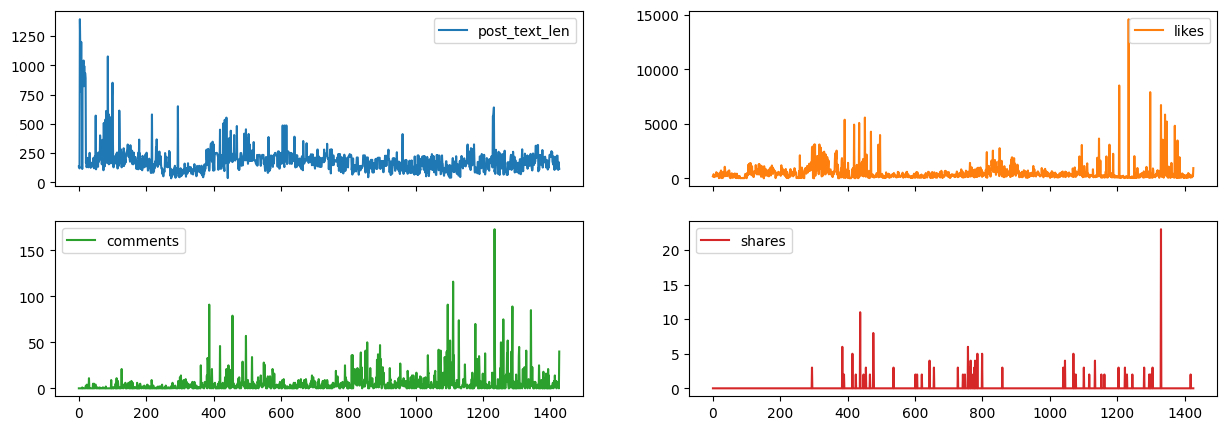

In [288]:
df_vs = df[['post_text_len', 'likes', 'comments', 'shares']]

df_vs.plot(subplots=True, layout=(2,2), figsize=(15,5))

데이터셋은 시간 역순으로 정렬되어 있음<br>
시간이 지남에 따라 포스트의 길이는 늘어나지만 바이럴(좋아요, 댓글, 공유)이 감소하는 현상이 관측됨

#### 감정지수 분석

해당 글의 감정점수(+ 긍정, - 부정) 분포 관측

/var/folders/9c/d9bwhd_11tqdj2jhtjf0wmh80000gn/T/ipykernel_97339/830037972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sentiment_score)


<Axes: xlabel='sentiment_score', ylabel='Density'>

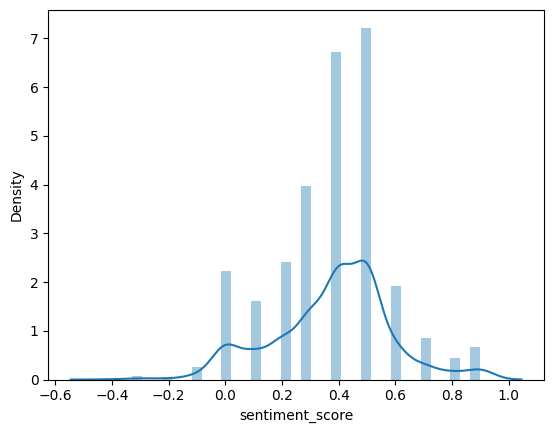

In [289]:
sns.distplot(df.sentiment_score)

In [290]:
df_time = df.set_index('time')

df_time.head()

,index,Brand,post_id,post_text,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude,post_text_len
time,,,,,,,,,,,
2021-04-03 11:36:51,0,DMK,5.311750e+15,Start on the right foot for your first impress...,177,0,0,https://facebook.com/DMKShoes/posts/5311745528...,0.2,0.7,137
2021-04-02 15:58:02,1,DMK,5.307740e+15,Getting that crop top + wide trousers combo ri...,216,0,0,https://facebook.com/DMKShoes/posts/5307740495...,0.3,0.9,137
2021-04-01 16:17:29,2,DMK,5.302814e+15,Sweet dreams are made of these - Bubble Dream ...,385,0,0,https://facebook.com/DMKShoes/posts/5302814246...,0.4,1.2,120
2021-03-30 15:41:29,3,DMK,5.292993e+15,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",214,0,0,https://facebook.com/DMKShoes/posts/5292992840...,0.0,4.5,1395
2021-03-28 11:36:40,4,DMK,5.280722e+15,"@annavanticalopez: ""When I first started model...",118,0,0,https://facebook.com/DMKShoes/posts/5280721625...,0.0,3.4,1187


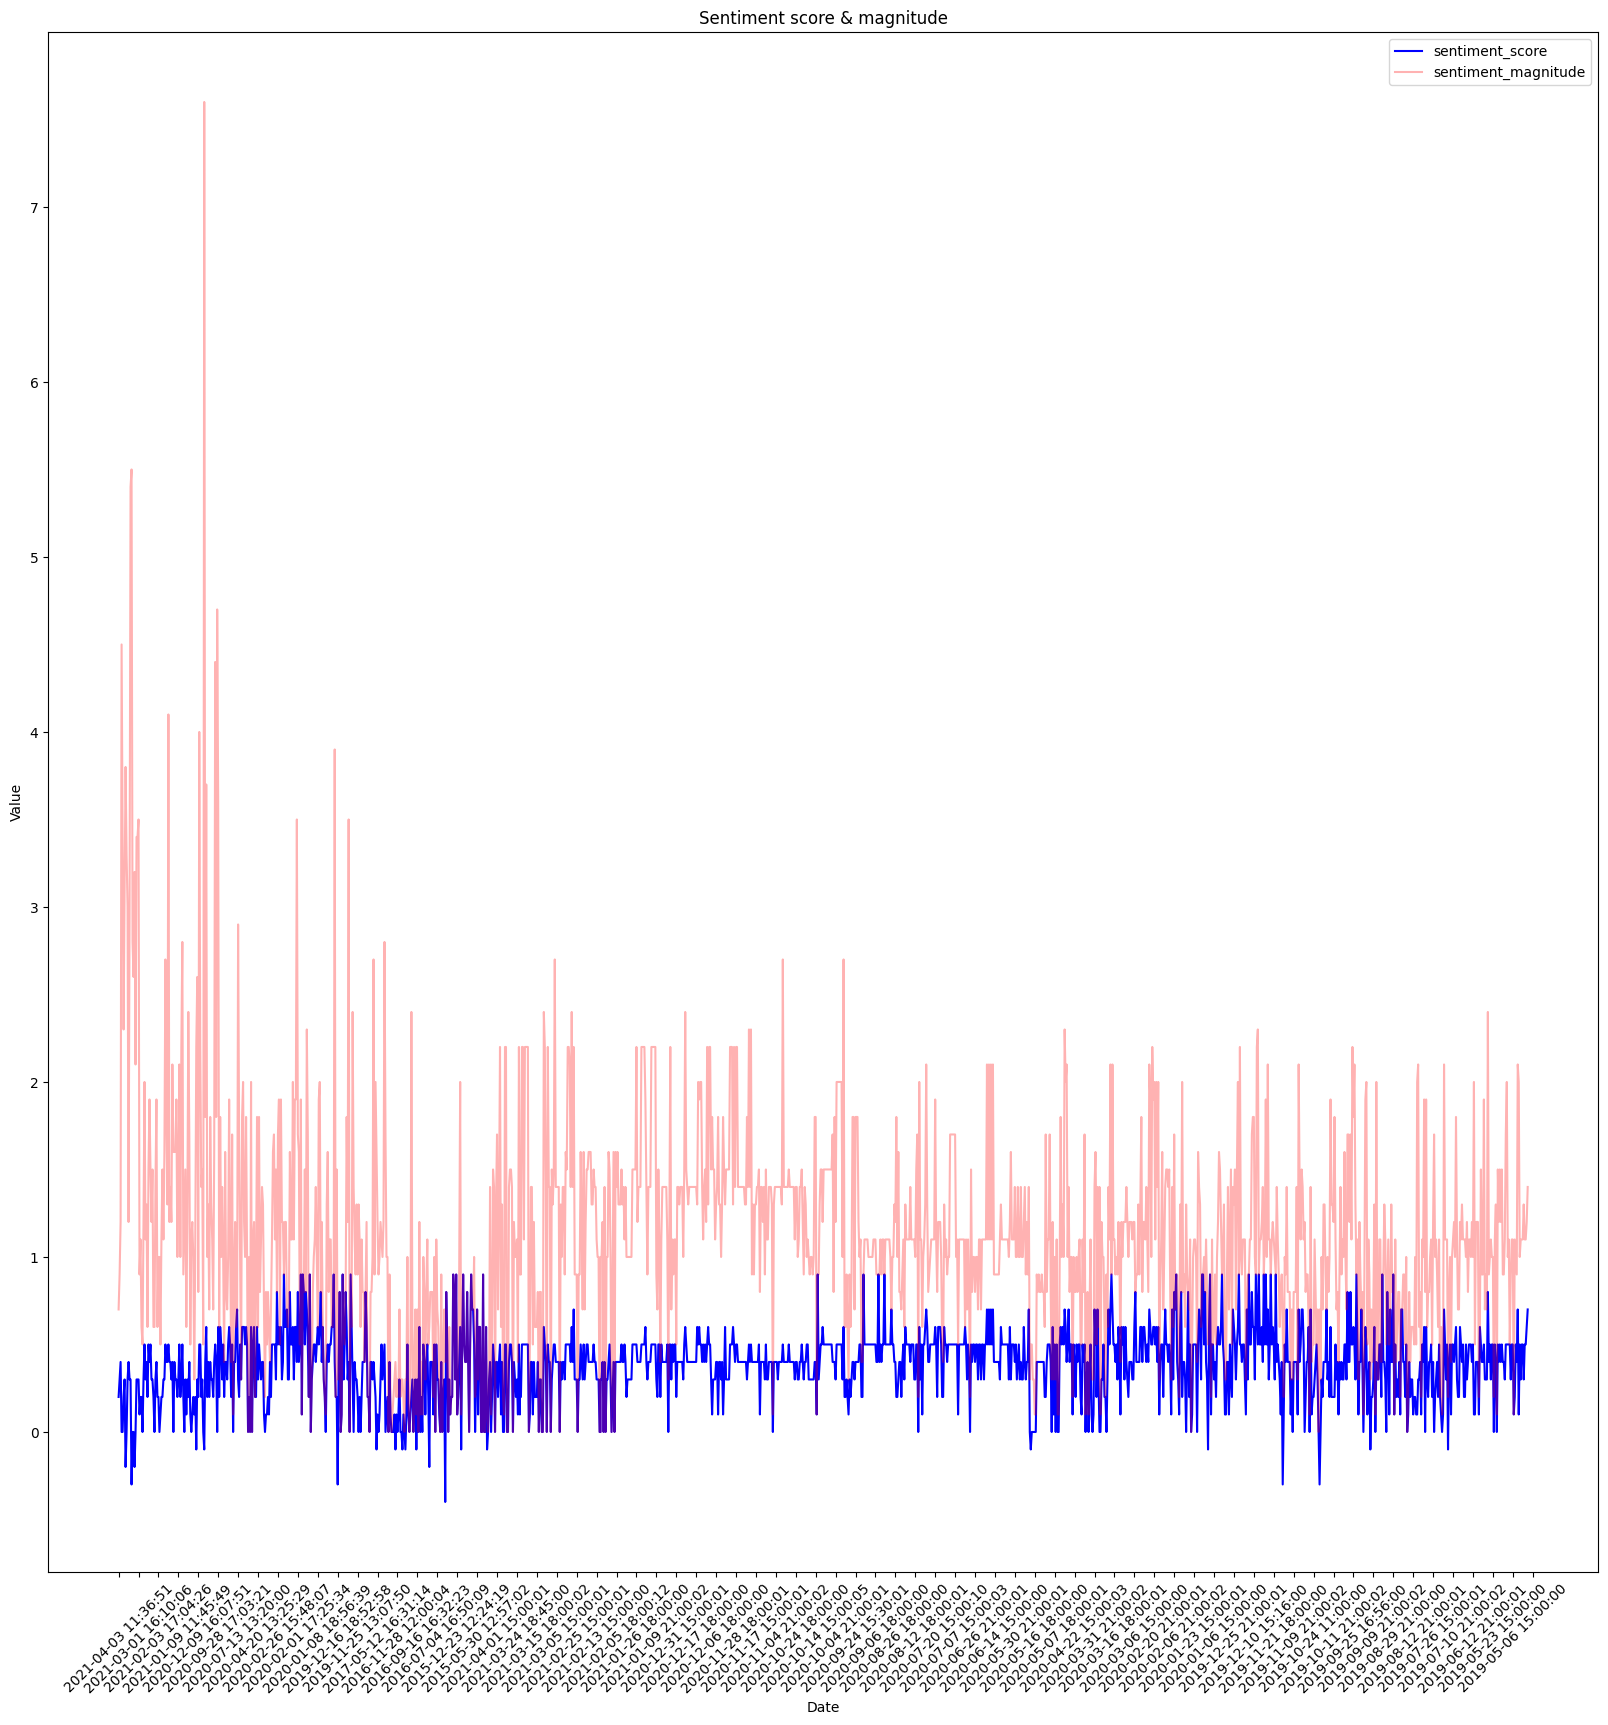

In [301]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()

ax.plot(df_time.index, df_time.sentiment_score, color='blue')
ax.plot(df_time.index, df_time.sentiment_magnitude, color='red', alpha=0.3)

plt.title('Sentiment score & magnitude')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(np.arange(0, len(df_time), 20), rotation=45)
plt.legend(['sentiment_score', 'sentiment_magnitude'])
plt.show()

시간이 지남에 따라 감정 점수가 떨어지는 현상 관측<br>
score 자체는 감소폭이 미미하지만 magnitude 값이 대폭 증가하는 것을 알 수 있음<br>
정밀 분석을 위해서는 sentiment_magnitude 값을 활용해 중립 감정 상태인지 복합 감정 상태인지를 검토할 필요가 있음

## Fashion Retail Sales

출처 : Kaggle

다양한 의류 판매점의 거래량 현황과 평점, 거래 수단 등을 정리한 데이터셋

[Dataset Link](https://www.kaggle.com/datasets/fekihmea/fashion-retail-sales)

### Columns

* Customer Reference ID : 고객 식별자
* Item Purchased : 구매한 아이템
* Purchase Amount (USD) : 매출액 
* Date Purchase : 구매 일자
* Review Rating : 평점
* Payment Method : 결제수단

In [273]:
df = pd.read_csv('datasets/Fashion_Retail_Sales.csv')

df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [274]:
len(df)

3400

결측치 관측

다양한 분석 방법론에 대한 실험을 위해 이번 결측치는 항목 정보의 특성을 고려해 '없음'을 가정하고 0으로 치환하여 분석

In [275]:
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [276]:
df.fillna(0, inplace=True)
df.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

#### 총 매출액 정보 추출

아이템 항목 당 총 매출액에 대한 정보를 정제하여 추출

In [277]:
row_list = []
# total_df = pd.DataFrame(columns=['Item Purchased', 'Total Sales'])

for d in df['Item Purchased'].unique():
    tmp = df[df['Item Purchased'] == str(d)]
    income = tmp['Purchase Amount (USD)'].sum()
    dict1 = {
        'Item Purchased' : d,
        'Total Sales' : income
    }
    row_list.append(dict1)
    # print(f'{d} 총 매출 : {income}')

total_df = pd.DataFrame(row_list)

total_df.head()

,Item Purchased,Total Sales
0,Handbag,12668.0
1,Tunic,17275.0
2,Tank Top,8296.0
3,Leggings,8087.0
4,Wallet,9372.0


항목 별 매출액 순위 조회

In [205]:
total_df.sort_values(by='Total Sales', ascending=False).groupby('Item Purchased').head()

,Item Purchased,Total Sales
1,Tunic,17275.0
8,Jeans,13068.0
12,Pajamas,12798.0
19,Shorts,12702.0
0,Handbag,12668.0
15,Gloves,12330.0
21,Boots,11891.0
14,Poncho,11422.0
18,Flip-Flops,11309.0
10,Slippers,11284.0


총 매출액 시각화

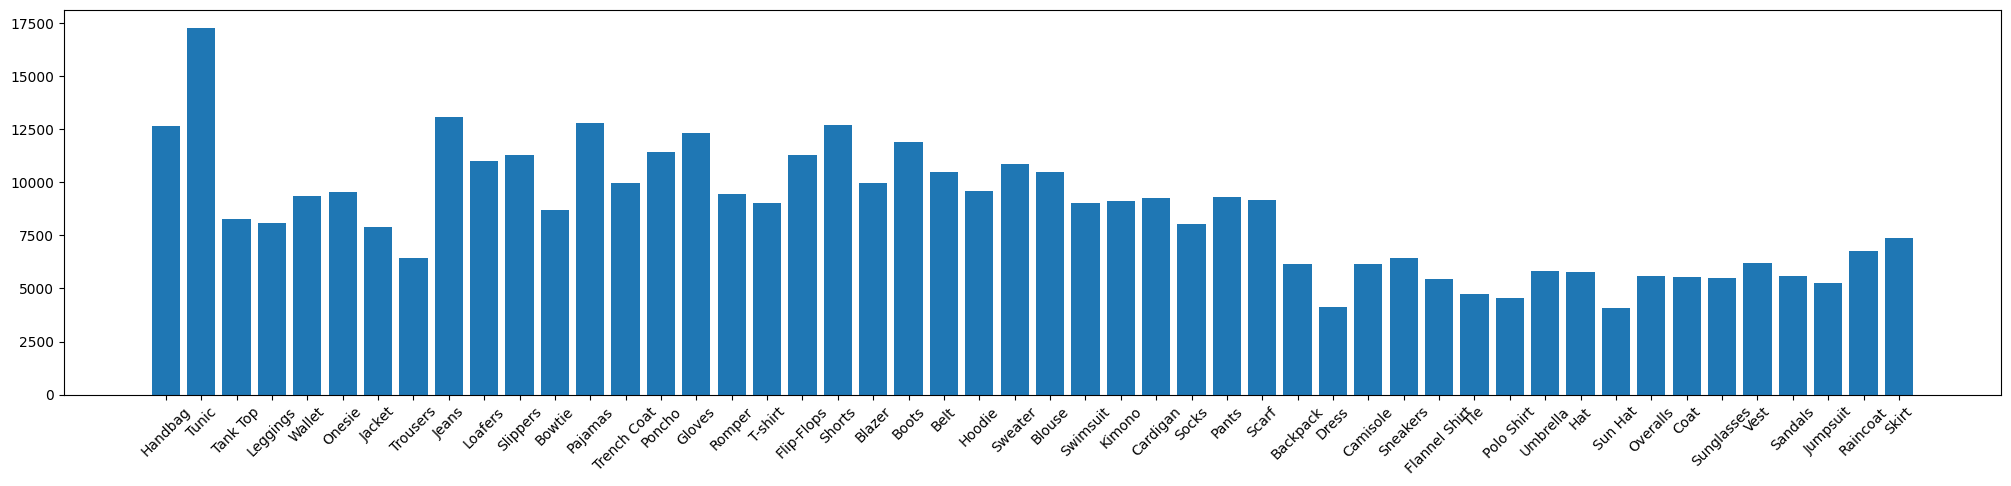

In [191]:
plt.figure(figsize=(25, 5))
plt.bar(total_df['Item Purchased'], total_df['Total Sales'])
plt.xticks(rotation=45)

plt.show()

#### 시간 단위 매출 변화

상위 4개의 아이템에 대한 시간 별 매출액 변화 추이 관측

In [208]:
date_df = df.set_index('Date Purchase')

date_df = date_df.sort_index()
date_df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method
Date Purchase,,,,,
2022-10-02,4092,Polo Shirt,200.0,1.8,Credit Card
2022-10-02,4108,Handbag,50.0,2.1,Credit Card
2022-10-02,4020,Loafers,NaN,1.3,Credit Card
2022-10-02,4071,Raincoat,193.0,3.9,Credit Card
2022-10-02,4014,Tank Top,99.0,1.2,Cash


In [209]:
date_df.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method
Date Purchase,,,,,
2023-10-01,4029,Pajamas,151.0,4.0,Cash
2023-10-01,4000,Wallet,58.0,2.6,Credit Card
2023-10-01,4110,Kimono,46.0,4.6,Cash
2023-10-01,4108,Camisole,46.0,1.8,Cash
2023-10-01,4005,Vest,122.0,2.0,Cash


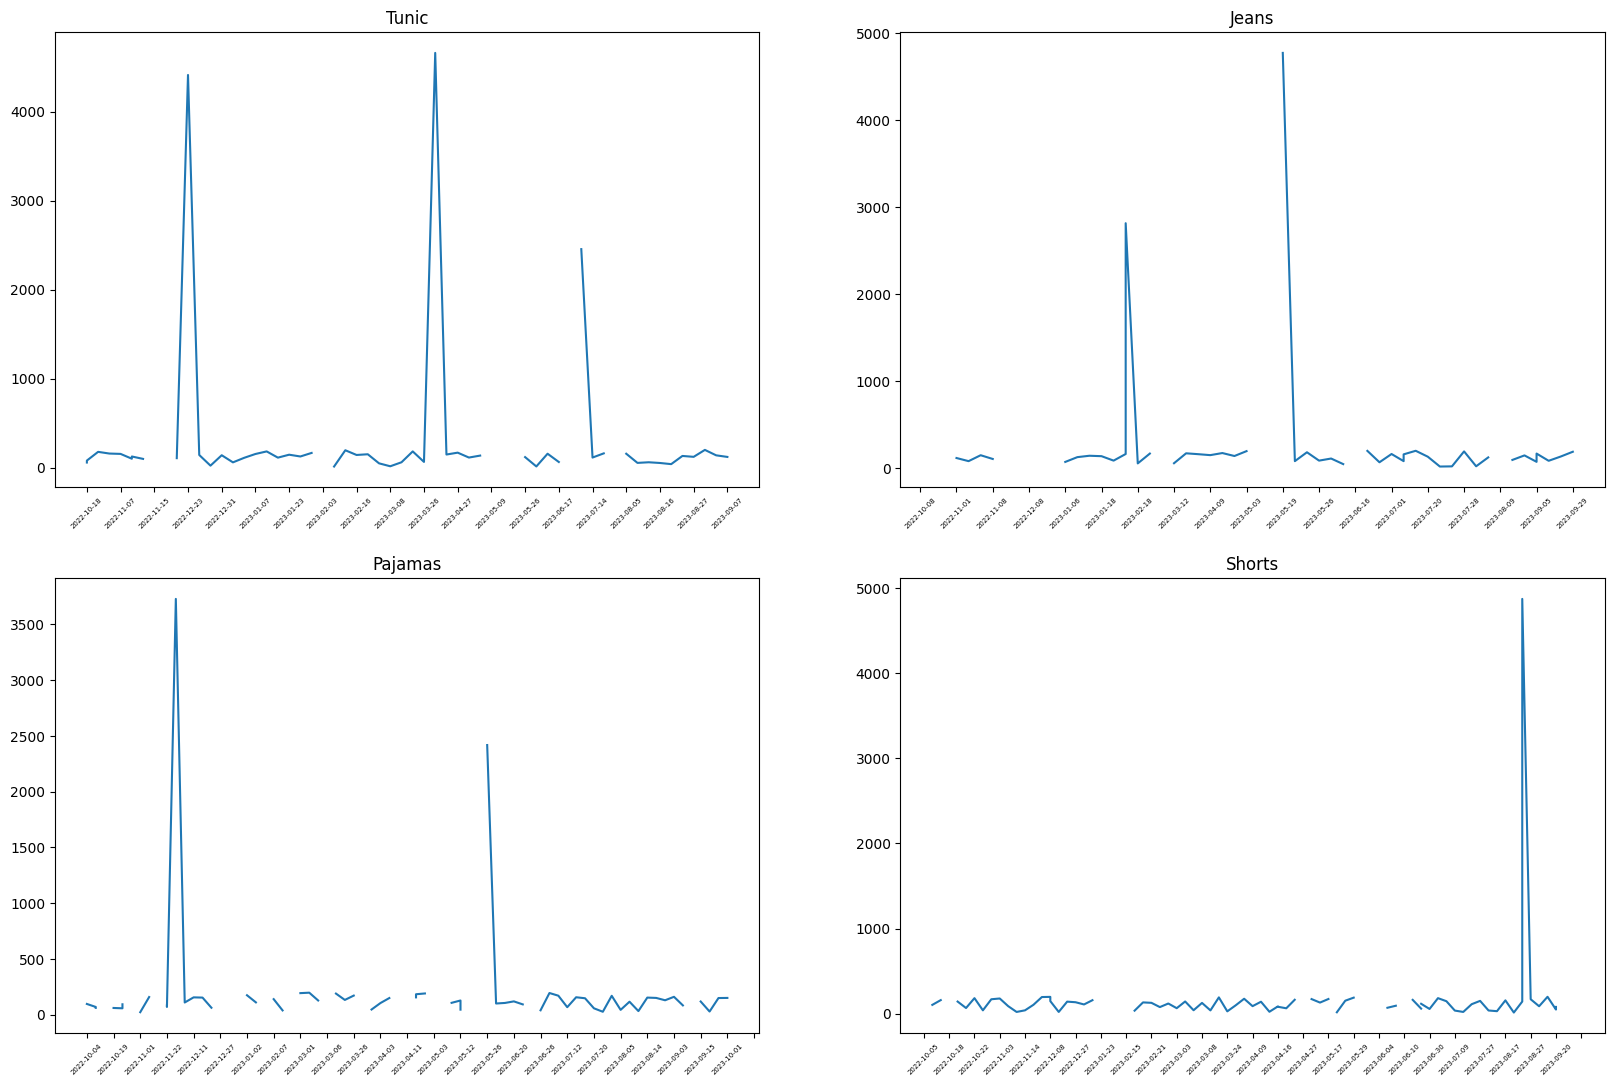

In [236]:
top4 = ['Tunic', 'Jeans', 'Pajamas', 'Shorts']
plt.figure(figsize=(20,13))

for i in range(len(top4)):
    tmp = date_df[date_df['Item Purchased'] == str(top4[i])]
    tmp = tmp['Purchase Amount (USD)']

    plt.subplot(2,2,i+1)
    plt.xticks(np.arange(0, len(date_df), 3), rotation=45, size=5)
    plt.title(top4[i])
    plt.plot(tmp)

plt.show()

연도 단위 데이터가 쌓이면 해당 아이템이 특정 기간에 많이 판매되는 것인지, 해당 연도의 어떤 특별한 상황(유명인의 바이럴 등)과 연관된 매출 상승인지 분석 가능